In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
# training data
train_dataset = image_dataset_from_directory('data/cats_and_dogs_small/train',
                                             shuffle=True,
                                             batch_size=128,
                                             image_size=(160, 160))

# validation data
validation_dataset = image_dataset_from_directory('data/cats_and_dogs_small/validation',
                                                  shuffle=True,
                                                  batch_size=128,
                                                  image_size=(160, 160))
print(train_dataset.class_names)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
['cats', 'dogs']


In [3]:
# data augmentation 1
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal')
])

In [4]:
for images, _ in train_dataset.take(1):
    print(images.shape)

(128, 160, 160, 3)


In [5]:
for images, _ in train_dataset.take(1):
    print(images.shape)
    
    augmented_image = data_augmentation(images)
    print(augmented_image.shape)

(128, 160, 160, 3)
(128, 160, 160, 3)


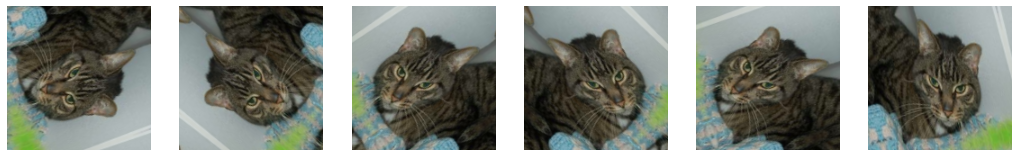

In [6]:
# data augmentation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

for images, _ in train_dataset.take(1):
    plt.figure(figsize=(18, 15))
    for i in range(6):
        # data augmentation
        augmented_image = data_augmentation(images[0:1]/255.)
    
        ax = plt.subplot(1, 6, i+1)
        plt.imshow(augmented_image[0])
        plt.axis('off')

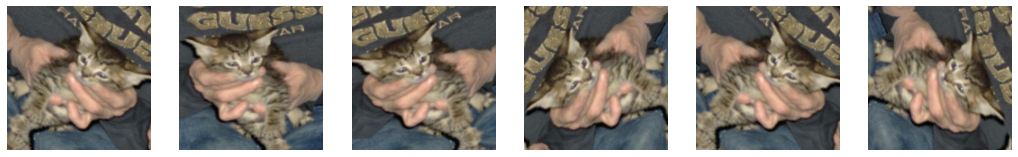

In [7]:
# data augmentation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255., offset=0.)
])

for images, _ in train_dataset.take(1):
    plt.figure(figsize=(18, 15))
    for i in range(6):
        # data augmentation
        augmented_image = data_augmentation(images[0:1])
    
        ax = plt.subplot(1, 6, i+1)
        plt.imshow(augmented_image[0])
        plt.axis('off')

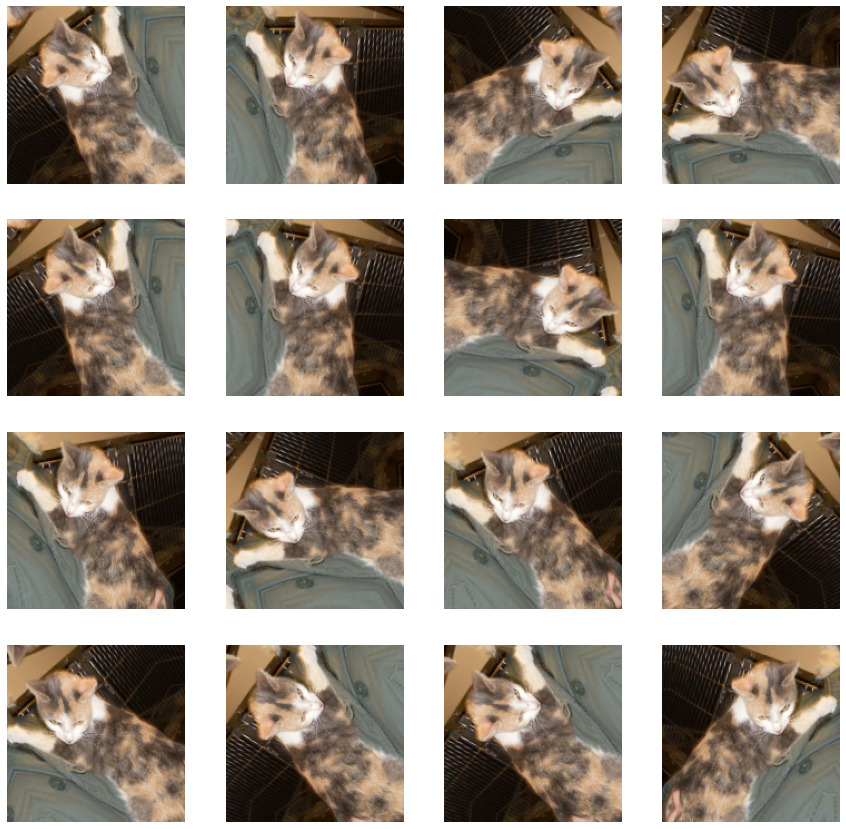

In [9]:
for images, _ in train_dataset.take(1):
    plt.figure(figsize=(15, 15))
    for i in range(16):
        # data augmentation
        augmented_image = data_augmentation(images[0:1])
    
        ax = plt.subplot(4, 4, i+1)
        plt.imshow(augmented_image[0])
        plt.axis('off')